In [12]:
import numpy as np
import os
import imageio
dir=os.listdir("/Users/wangwenqing/Desktop/算法/Images/beach/")
count=0
for d in dir:
    a=imageio.imread("/Users/wangwenqing/Desktop/算法/Images/beach/"+d)
    a_np=np.array(a)
    #print(a_np.shape)
    a_r=a_np[:,:,0]
    a_g=a_np[:,:,1]
    a_b=a_np[:,:,2]
    a_rs=np.reshape(a_r,(-1,1))
    a_gs=np.reshape(a_g,(-1,1))
    a_bs=np.reshape(a_b,(-1,1))
    #print(a_rs.shape)
    n=a_rs.shape[0]
    m=a_gs.shape[0]
    k=a_bs.shape[0]
    #print(n)
    #if a_rs.shape!=65536:   
    if count==0:
        array_nr=a_rs
        array_ng=a_gs
        array_nb=a_bs
        count=count+1
    else:
        if n!=65536:
            a_rs=np.pad(a_rs,(0,65536-n))
        if m!=65536:
            a_gs=np.pad(a_gs,(0,65536-m))
        if k!=65536:
            a_bs=np.pad(a_bs,(0,65536-k))
        array_nr=np.column_stack((array_nr,a_rs))#列向量叠起来
        array_ng=np.column_stack((array_ng,a_gs))
        array_nb=np.column_stack((array_nb,a_bs))
print(count)
print(array_nr.shape)
print(array_nr)

1
(65536, 1124)
[[212 222 174 ...   0   0   0]
 [212 218 177 ...   0   0   0]
 [212 220 176 ...   0   0   0]
 ...
 [160 198 184 ...   0   0   0]
 [161 198 184 ...   0   0   0]
 [160 191 183 ...   0   0   0]]


In [12]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
#定义函数
# 打印计算过程RGB的值
# 挑选的特征向量的个数
# 参数选择0.9 0.95比较重建效果 alfa参数的影响
#还原去中心话的数据
#加回原来的中心
#计算压缩率中需考虑（保证重构正常 需要存储每张图片的中心向量）
def comp_2d(image_2d,alfa): 
    cov_mat=image_2d-np.mean(image_2d,axis=0)
    center=np.mean(image_2d,axis=0)
    eig_val,eig_vec=np.linalg.eig(np.cov(cov_mat))
    #特征值排序
    index=np.argsort(eig_val)
    index=index[::-1]
    eig_vec=eig_vec[:,index]
    eig_val=eig_val[index]
    #特征值选取
    eig_val_sum=np.sum(eig_val)
    p=np.linalg.matrix_rank(image_2d)#矩阵的秩的个数
    part_eig_val=0
    for i in range(p):
        part_eig_val=part_eig_val+eig_val[i]
        if part_eig_val>(0.01*alfa*eig_val_sum):
            break

    numpc=i#主特征的个数
    eig_vec=eig_vec[:,range(numpc)]
    #print("主特征值个数:")
    #print(i)
    #投影到新的空间
    score=np.dot(eig_vec.T,cov_mat)
    #计算压缩率
    #print("压缩率:")
    x=(np.size(eig_vec)+np.size(score)+np.size(center))/np.size(image_2d)
    x1=(np.size(eig_vec)+np.size(score))/np.size(image_2d)
    #print(x)
    #print("空间节省:")
    y=np.size(image_2d)-(np.size(eig_vec)+np.size(score)+np.size(center))
    y1=np.size(image_2d)-(np.size(eig_vec)+np.size(score))
    #print(y)
    #重建图像
    #计算重构误差，案例研究
    #采用二范数求重构误差
    recon=np.dot(eig_vec,score)+np.mean(image_2d,axis=0).T#将去除的中心加回来 图像质量更好
    recon1=np.dot(eig_vec,score)
    recon_img_mat=np.uint8(np.absolute(recon))
    # sum1=0
    # sum2=0
    # error=0
    # errors=image_2d-recon_img_mat
    # for i in range(image_2d.shape[0]):
    #     sum1+=np.dot(image_2d[i],image_2d[i])
    #     sum2+=np.dot(errors[i],errors[i])
    #     error+=sum2**2
    # error=error**0.5

    #print("重构误差",error)
    #print("信息丢失率:",sum2/sum1)
    recon_img_mat1=np.uint8(np.absolute(recon1))
    
    #reconstruction_error = np.linalg.norm(recon_img_mat1.astype(int) - image_2d.astype(int)) / np.linalg.norm(image_2d)
    reconstruction_error = np.linalg.norm(recon_img_mat1.astype(int) - image_2d.astype(int)) 
    
    # recon_error=-recon_img_mat+image_2d
    # recon_error_val=np.linalg.norm(recon_error)
    #print(recon_error_val**2)
    
    return recon_img_mat1,reconstruction_error,x1,y1
    #return recon_img_mat
def image_result(img_path,alfa):
    a=imageio.imread(img_path)
    a_np=np.array(a)
#     a_r=a_np[:,:,0]
#     a_g=a_np[:,:,1]
#     a_b=a_np[:,:,2]
    dir=os.listdir("/Users/wangwenqing/Desktop/算法/Images/airplane/")
    count=0
    for d in dir:
        a=imageio.imread("/Users/wangwenqing/Desktop/算法/Images/airplane/"+d)
        a_np=np.array(a)
    #print(a_np.shape)
        a_r=a_np[:,:,0]
        a_g=a_np[:,:,1]
        a_b=a_np[:,:,2]
          
        
    # a_r_recon=comp_2d(a_r)
    # a_g_recon=comp_2d(a_g)
    # a_b_recon=comp_2d(a_b)
    a_r_recon,a_r_recon_error,r_x,r_y=comp_2d(a_r,alfa)
    a_g_recon,a_g_recon_error,g_x,g_y=comp_2d(a_g,alfa)
    a_b_recon,a_b_recon_error,b_x,b_y=comp_2d(a_b,alfa)
    recon_color_img=np.dstack((a_r_recon,a_g_recon,a_b_recon))
    recon_color_img=Image.fromarray(recon_color_img)
    #recon_color_img.show()#显示图像

    return a_r_recon_error,a_g_recon_error,a_b_recon_error,r_x,g_x,b_x,r_y,g_y,b_y
#a=imageio.imread("/Users/wangwenqing/Desktop/算法/Images/airplane/airplane00.tif")
errors_r=[]
errors_g=[]
errors_b=[]
ysl=[]
compacts=[]
dir=os.listdir("/Users/wangwenqing/Desktop/算法/Images/airplane/")

for alfa in range(50,100,5):
    sum_r=0
    compact_s=0
    error_sum_r=0
    error_sum_g=0
    error_sum_b=0
    count=0
    for d in dir:
      #print(d)
        #count=count+1
    #image_result("/Users/wangwenqing/Desktop/算法/Images/beach/"+d)
        r_error,g_error,b_error,r_x,g_x,b_x,r_y,g_y,b_y=image_result("/Users/wangwenqing/Desktop/算法/Images/airplane/"+d,alfa)
        error_sum_b=error_sum_b+b_error
        error_sum_r=error_sum_r+r_error
        error_sum_g=error_sum_g+g_error
        sum_r=sum_r+r_x+g_x+b_x
        compact_s=compact_s+r_y+g_y+b_y
    print("********")
    print(count)
    print("压缩率：",alfa)
    print("数据集的重构误差：")
    errors_r.append(error_sum_r/100)
    errors_g.append(error_sum_g/100)
    errors_b.append(error_sum_b/100)
    print(error_sum_r/100)
    print(error_sum_g/100)
    print(error_sum_b/100)
    print("压缩率")
    print(sum_r/300)
    ysl.append(sum_r/300)
    print("空间节省")
    print(compact_s/300)
    compacts.append(compact_s/300)




********
0
压缩率： 50
数据集的重构误差：
34154.74163275133
39739.46865522998
35897.02723067754
压缩率
0.015625
空间节省
64512.0
********
0
压缩率： 55
数据集的重构误差：
34154.74163275133
39739.46865522998
35897.02723067754
压缩率
0.015625
空间节省
64512.0
********
0
压缩率： 60
数据集的重构误差：
34154.74163275133
39739.46865522998
35741.51292265064
压缩率
0.018229166666666668
空间节省
64341.333333333336
********
0
压缩率： 65
数据集的重构误差：
34140.29126999355
39202.41773156353
35741.51292265064
压缩率
0.0234375
空间节省
64000.0
********
0
压缩率： 70
数据集的重构误差：
34140.29126999355
38856.679425807786
35237.19119055892
压缩率
0.028645833333333332
空间节省
63658.666666666664
********
0
压缩率： 75
数据集的重构误差：
33634.08168807347
38749.80663177558
34954.199661843144
压缩率
0.0390625
空间节省
62976.0
********
0
压缩率： 80
数据集的重构误差：
32919.602716314745
38386.58948122381
34501.8066918241
压缩率
0.052083333333333336
空间节省
62122.666666666664
********
0
压缩率： 85
数据集的重构误差：
32725.827292827893
38165.43010369458
33472.86902851328
压缩率
0.06770833333333333
空间节省
61098.666666666664
********
0
压缩率： 90
数据集的重构误差：
321

In [ ]:
print(np.size(errors_r))
print(np.size())

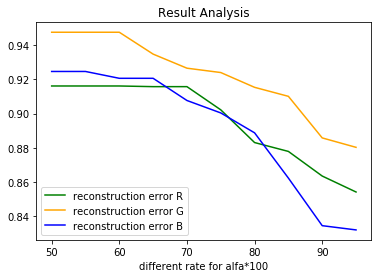

In [3]:
# -*- coding: UTF-8 -*-
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#这里导入你自己的数据
#......
#......
#x_axix，train_pn_dis这些都是长度相同的list()

#开始画图
x_axix=[]
for i in range(50,100,5):
    x_axix.append(i)
#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
plt.plot(x_axix, errors_r, color='green', label='reconstruction error R')
#plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
plt.plot(x_axix, errors_g,  color='orange', label='reconstruction error G')
plt.plot(x_axix, errors_b, color='blue', label='reconstruction error B')
#plt.plot(x_axix, ysl, color='red', label='compact rate')
plt.legend() # 显示图例

plt.xlabel('different rate for alfa*100')
#plt.ylabel('rate')
plt.show()
#python 一个折线图绘制多个曲线

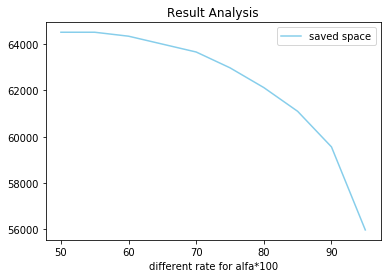

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#这里导入你自己的数据
#......
#......
#x_axix，train_pn_dis这些都是长度相同的list()

#开始画图
x_axix=[]
for i in range(50,100,5):
    x_axix.append(i)
#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
#plt.plot(x_axix, errors_r, color='green', label='reconstruction error R')
#plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
#plt.plot(x_axix, errors_g,  color='orange', label='reconstruction error G')
#plt.plot(x_axix, errors_b, color='blue', label='reconstruction error B')
plt.plot(x_axix, compacts, color='skyblue', label='saved space')
#plt.plot(x_axix, ysl, color='red', label='compact rate')
plt.legend() # 显示图例

plt.xlabel('different rate for alfa*100')
#plt.ylabel('rate')
plt.show()
#python 一个折线图绘制多个曲线

In [23]:
import numpy as np
import cv2 as cv
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

#定义函数
# 打印计算过程RGB的值
# 挑选的特征向量的个数
# 参数选择0.9 0.95比较重建效果 alfa参数的影响
#还原去中心话的数据
#加回原来的中心
#计算压缩率中需考虑（保证重构正常 需要存储每张图片的中心向量）

def comp_2d(covs,alfa):
    #print(covs)
    # cov_mat=image_2d-np.mean(image_2d,axis=0)
    # print(image_2d.shape)
    # print(covs.shape)
    # center=np.mean(image_2d,axis=0)
    #print(covs.shape)
    #print(covs)
    covs=covs-np.mean(covs,axis=0).reshape(1, -1)
    center=np.mean(covs,axis=0).reshape(1, -1)
    #print(center.shape)
    #print("&&&&&&",covs.shape)
    #print("******",center.shape)
    #print(covs)
    eig_val,eig_vec=np.linalg.eig(np.cov(covs))
    #print(eig_val)
    #特征值排序
    index=np.argsort(eig_val)
    index=index[::-1]
    eig_vec=eig_vec[:,index]
    eig_val=eig_val[index]
    #特征值选取
    eig_val_sum=np.sum(eig_val)
    #print(eig_val_sum)
    p=np.linalg.matrix_rank(covs)#矩阵的秩的个数
    part_eig_val=0
    for i in range(p):
        part_eig_val=part_eig_val+eig_val[i]
        if part_eig_val>(0.01*alfa*eig_val_sum):
            break
    numpc=i#主特征的个数
    #print(numpc)
    eig_vec=eig_vec[:,range(numpc)]
    #print("主特征值个数:")
    #print(i)
    #投影到新的空间
    score=np.dot(eig_vec.T,covs)
    #计算压缩率
    print("压缩率:")
    x=(np.size(eig_vec)+np.size(score)+np.size(center))/np.size(covs)
    x1=(np.size(eig_vec)+np.size(score))/np.size(covs)
    print(x)
    
    print("空间节省:")
    y=np.size(covs)-(np.size(eig_vec)+np.size(score)+np.size(center))
    y1=np.size(covs)-(np.size(eig_vec)+np.size(score))
    print(y)
    #重建图像
    #计算重构误差，案例研究
    #采用二范数求重构误差
    recon=np.dot(eig_vec,score)+np.mean(covs,axis=0).reshape(1,-1)#将去除的中心加回来 图像质量更好
    #print("recon",recon.shape)
    #print("recon",np.mean(covs,axis=1).reshape(-1,1).shape)
    recon1=np.dot(eig_vec,score)
    recon_img_mat=np.uint8(np.absolute(recon))
    # sum1=0
    # sum2=0
    # error=0
    # errors=image_2d-recon_img_mat
    # for i in range(image_2d.shape[0]):
    #     sum1+=np.dot(image_2d[i],image_2d[i])
    #     sum2+=np.dot(errors[i],errors[i])
    #     error+=sum2**2
    # error=error**0.5

    #print("重构误差",error)
    #print("信息丢失率:",sum2/sum1)
    recon_img_mat1=np.uint8(np.absolute(recon1))
    re_error = np.linalg.norm(recon_img_mat.astype(int) - covs.astype(int)) / np.linalg.norm(covs)
    # recon_error=-recon_img_mat+image_2d
    # recon_error_val=np.linalg.norm(recon_error)
    #print(recon_error_val**2)
    
    return recon_img_mat,re_error,x1,y1,center
    #return recon_img_mat
error_g=[]
def image_result(alfa):
    path=[]
    
    reconstruction_error=0
    dir=os.listdir("/Users/wangwenqing/Desktop/算法/Images/airplane/")
    count=0
    array_rr=[]
    for d in dir:
        
        a=imageio.imread("/Users/wangwenqing/Desktop/算法/Images/airplane/"+d)
        path.append(a)
        a_np=np.array(a)
        
    #print(a_np.shape)
        a_r=a_np[:,:,0]
        #print(a_r)
        a_g=a_np[:,:,1]
        a_b=a_np[:,:,2]
        a_rs=a_r.reshape(1,-1)
    #print(a_rs.shape)
        a_gs=a_g.reshape(1,-1)
        a_bs=a_b.reshape(1,-1)
    #print(a_rs.shape)
        n=a_rs.shape[1]
        m=a_gs.shape[1]
        k=a_bs.shape[1]
    #print(n)
    #if a_rs.shape!=65536:   
        if count==0:
            array_nr=a_rs
            array_ng=a_gs
            array_nb=a_bs
            #count=count+1
        elif count>=99:
            break
        else:
            if n!=65536:
            #print("$$$$$$$:",a_rs.shape)
                a_rs=np.pad(a_rs,((0,0),(0,65536-n)))
            #print("*******:",a_rs.shape)
            if m!=65536:
                a_gs=np.pad(a_gs,((0,0),(0,65536-m)))
            if k!=65536:
                a_bs=np.pad(a_bs,((0,0),(0,65536-k)))
        array_rr.append(a_rs)
        #print(a_rs.shape)
        array_nr=np.row_stack((array_nr,a_rs))#行向量叠起来
        #print(count)
        array_ng=np.row_stack((array_ng,a_gs))
        array_nb=np.row_stack((array_nb,a_bs))
        count=count+1

    a_r_recon,a_r_recon_error,r_x,r_y,center=comp_2d(array_nr,alfa)
    a_g_recon,a_g_recon_error,g_x,g_y,center=comp_2d(array_ng,alfa)
    a_b_recon,a_b_recon_error,b_x,b_y,center=comp_2d(array_nb,alfa)
    #print(array_nb.shape)
    #print(array_nr.shape)
    
    
    
    
    
    # b=imageio.imread(img_path)
    # b_np=np.array(b)
    # b_r=b_np[:,:,0]
    # b_g=b_np[:,:,1]
    # b_b=b_np[:,:,2]
    
    # a_r_recon=comp_2d(a_r)
    # a_g_recon=comp_2d(a_g)
    # a_b_recon=comp_2d(a_b)
    
    
    
    for i in range (100):
        #print(a_r_recon[i])
    #     a_np=np.array(path[i])
    # #print(a_np.shape)
    #     a_r=a_np[:,:,0]
    #     a_g=a_np[:,:,1]
    #     a_b=a_np[:,:,2]
    #     a_rt=a_r.reshape(1,-1)
    #     a_gt=a_g.reshape(1,-1)
    #     a_bt=a_b.reshape(1,-1)
        # r1=a_rt.shape[1]
        # r2=a_gt.shape[1]
        # r3=a_bt.shape[1]
        # if r1!=65536:
        #     #print("$$$$$$$:",a_rs.shape)
        #     a_r=np.pad(a_rt,((0,0),(0,65536-r1)))
        #     a_r=a_r.reshape(256,256)
        #     #print("*******:",a_rs.shape)
        # if r2!=65536:
        #     a_g=np.pad(a_gt,((0,0),(0,65536-r2)))
        #     a_g=a_g.reshape(256,256)
        # if r3!=65536:
        #     a_b=np.pad(a_bt,((0,0),(0,65536-r3)))
        #     a_b=a_b.reshape(256,256)
       
        #print(a_r_recon[i].shape)
        k=a_r_recon[i].reshape(256,256)
        # print("对比",k.shape,"&",a_r.shape)
        #print("对比",k,"&",a_r)
        #t=array_rr[i].reshape(256,256)
        r_error = np.linalg.norm(k.astype(int) - a_r.astype(int)) / np.linalg.norm(a_r.astype(int))
        t_error = np.linalg.norm(k.astype(int) - a_r.astype(int)) 
        reconstruction_error=reconstruction_error+t_error
    print("重构误差:",reconstruction_error/100)
    error_g.append(reconstruction_error/100)
    print("error_g",error_g)
        #recon_color_img=np.dstack((a_r_recon[i],a_g_recon[i],a_b_recon[i]))
        #recon_color_img=Image.fromarray(recon_color_img)
        #recon_color_img.show()#显示图像
    # #for i in range (101):
    # a_r_recon=np.arange(65536).reshape(256,256)
    # #a_r_recon[i]=a_r_recon[i].reshape(256,256)
    # print(a_r_recon.shape)
    

    return a_r_recon_error,a_g_recon_error,a_b_recon_error,r_x,g_x,b_x,r_y,g_y,b_y
#a=imageio.imread("/Users/wangwenqing/Desktop/算法/Images/airplane/airplane00.tif")


errors_r=[]
errors_g=[]
errors_b=[]
ysl1=[]
compacts1=[]
dir=os.listdir("/Users/wangwenqing/Desktop/算法/Images/airplane/")

for alfa in range(50,100,5):
    sum_r=0
    compact_s=0
    error_sum_r=0
    error_sum_g=0
    error_sum_b=0
    #count=0
    # for d in dir:
    #     print(d)
      #print(d)
        #count=count+1
    #image_result("/Users/wangwenqing/Desktop/算法/Images/beach/"+d)
    r_error,g_error,b_error,r_x,g_x,b_x,r_y,g_y,b_y=image_result(alfa)
    error_sum_b=error_sum_b+b_error
    error_sum_r=error_sum_r+r_error
    error_sum_g=error_sum_g+g_error
    sum_r=sum_r+r_x+g_x+b_x
    compact_s=compact_s+r_y+g_y+b_y
    # print("********")
    # print(count)
    # print("压缩率：",alfa)
    # print("数据集的重构误差：")
    # errors_r.append(error_sum_r/100)
    # errors_g.append(error_sum_g/100)
    # errors_b.append(error_sum_b/100)
    # print(error_sum_r/100)
    # print(error_sum_g/100)
    # print(error_sum_b/100)
    # print("压缩率")
    # print(sum_r/300)
    ysl1.append(r_x/3)
    # print("空间节省")
    # print(compact_s/3)
    compacts1.append(r_y/300)





压缩率:
0.190274658203125
空间节省:
5306616
压缩率:
0.2002899169921875
空间节省:
5240980
压缩率:
0.2002899169921875
空间节省:
5240980
重构误差: 31765.966335854024
error_g [31765.966335854024]
压缩率:
0.230335693359375
空间节省:
5044072
压缩率:
0.2403509521484375
空间节省:
4978436
压缩率:
0.230335693359375
空间节省:
5044072
重构误差: 31533.220010507524
error_g [31765.966335854024, 31533.220010507524]
压缩率:
0.270396728515625
空间节省:
4781528
压缩率:
0.2804119873046875
空间节省:
4715892
压缩率:
0.2804119873046875
空间节省:
4715892
重构误差: 31355.486772031843
error_g [31765.966335854024, 31533.220010507524, 31355.486772031843]
压缩率:
0.3204730224609375
空间节省:
4453348
压缩率:
0.33048828125
空间节省:
4387712
压缩率:
0.33048828125
空间节省:
4387712
重构误差: 31090.169947925027
error_g [31765.966335854024, 31533.220010507524, 31355.486772031843, 31090.169947925027]
压缩率:
0.37054931640625
空间节省:
4125168
压缩率:
0.3805645751953125
空间节省:
4059532
压缩率:
0.3805645751953125
空间节省:
4059532
重构误差: 30880.299975232294
error_g [31765.966335854024, 31533.220010507524, 31355.486772031843, 31090.1699479250

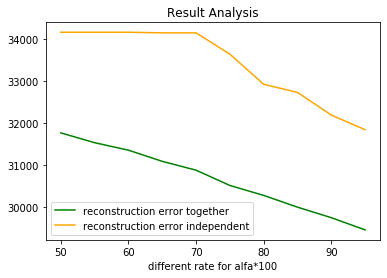

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#这里导入你自己的数据
#......
#......
#x_axix，train_pn_dis这些都是长度相同的list()

#开始画图
x_axix=[]
for i in range(50,100,5):
    x_axix.append(i)
#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
plt.plot(x_axix, error_g, color='green', label='reconstruction error together')
#plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
plt.plot(x_axix, errors_r,  color='orange', label='reconstruction error independent')
#plt.plot(x_axix, errors_b, color='blue', label='reconstruction error B')
#plt.plot(x_axix, ysl, color='red', label='compact rate')
plt.legend() # 显示图例

plt.xlabel('different rate for alfa*100')
#plt.ylabel('rate')
plt.show()
#python 一个折线图绘制多个曲线

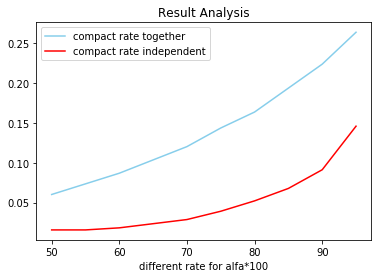

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#这里导入你自己的数据
#......
#......
#x_axix，train_pn_dis这些都是长度相同的list()

#开始画图
x_axix=[]
for i in range(50,100,5):
    x_axix.append(i)
#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
#plt.plot(x_axix, errors_r, color='green', label='reconstruction error R')
#plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
#plt.plot(x_axix, errors_g,  color='orange', label='reconstruction error G')
#plt.plot(x_axix, errors_b, color='blue', label='reconstruction error B')
plt.plot(x_axix, ysl1, color='skyblue', label='compact rate together')
plt.plot(x_axix, ysl, color='red', label='compact rate independent')
plt.legend() # 显示图例

plt.xlabel('different rate for alfa*100')
#plt.ylabel('rate')
plt.show()
#python 一个折线图绘制多个曲线

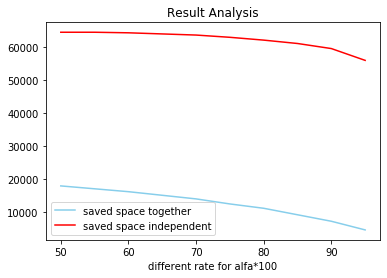

In [24]:
#开始画图
x_axix=[]
for i in range(50,100,5):
    x_axix.append(i)
#sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('Result Analysis')
#plt.plot(x_axix, errors_r, color='green', label='reconstruction error R')
#plt.plot(sub_axix, test_acys, color='red', label='testing accuracy')
#plt.plot(x_axix, errors_g,  color='orange', label='reconstruction error G')
#plt.plot(x_axix, errors_b, color='blue', label='reconstruction error B')
plt.plot(x_axix, compacts1, color='skyblue', label='saved space together')
plt.plot(x_axix, compacts, color='red', label='saved space independent')
plt.legend() # 显示图例

plt.xlabel('different rate for alfa*100')
#plt.ylabel('rate')
plt.show()